In [1]:
from scipy.stats import norm, cauchy, logistic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

In [2]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

def weight_4_gen(i, n):
    return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = np.array([weight_4_gen(i, n) for i in range(1, n + 1)])
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

def calculate_statistics(results_df, true_theta):
    """
    Calculate variance, bias, and MSE for each estimator

    Variance: Var(θ̂) = E[(θ̂ - E[θ̂])²]
    Bias: Bias(θ̂) = E[θ̂] - θ
    MSE: MSE(θ̂) = Var(θ̂) + Bias²(θ̂)
    """
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values

        # Variance
        variance = np.var(estimates, ddof=1)

        # Bias
        bias = np.mean(estimates) - true_theta

        # MSE
        mse = variance + bias**2

        stats[col] = {
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    return pd.DataFrame(stats).T

def run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=False):
    """
    Run simulation for given parameters and return results with statistics
    """
    weights_unbiased_3 = np.random.rand(n)
    res = []

    for _ in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        if exclude_est5:
            res.append([
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ])
        else:
            res.append([
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_5(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ])

    if exclude_est5:
        columns = ['theta_hat_1', 'theta_hat_2', 'theta_hat_3', 'theta_hat_4', 'theta_hat_6', 'theta_hat_7']
    else:
        columns = ['theta_hat_1', 'theta_hat_2', 'theta_hat_3', 'theta_hat_4', 'theta_hat_5', 'theta_hat_6', 'theta_hat_7']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df


# Initial exploration with θ=0, σ=1, n=50

In [3]:
theta = 0
sigma = 1
n = 50

res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=False)

print(f"Statistics for θ={theta}, σ={sigma}, n={n}")
print(stats_df)

Statistics for θ=0, σ=1, n=50
        Variance      Bias          MSE
θ̂₁     0.019537  0.001824     0.019540
θ̂₂     0.032485 -0.000283     0.032485
θ̂₃     0.026835 -0.000886     0.026836
θ̂₄     0.009508  0.973860     0.957912
θ̂₅  8763.605398  2.565629  8770.187852
θ̂₆     0.519785  0.006437     0.519826
θ̂₇     0.009736  0.997880     1.005500


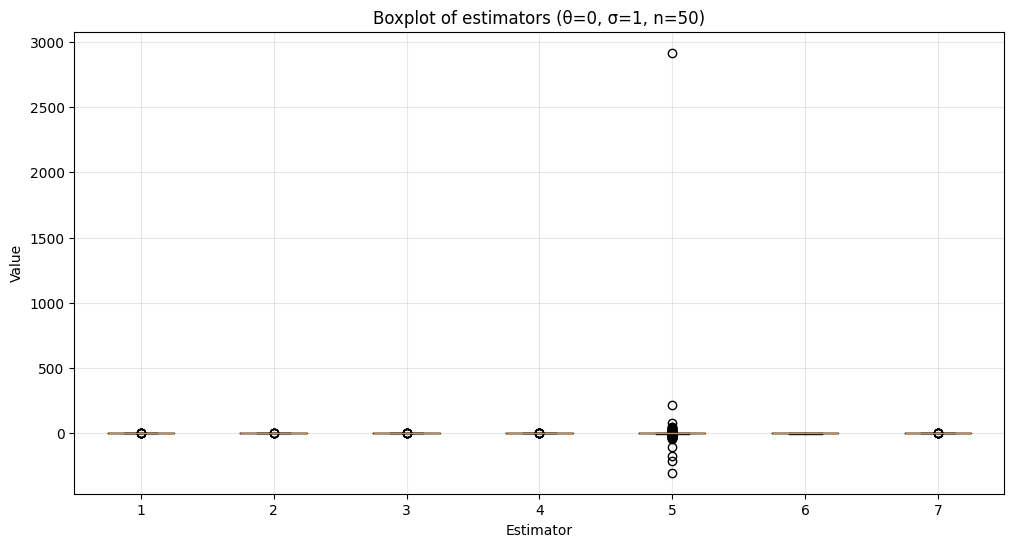

In [4]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df)
plt.title(f'Boxplot of estimators (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Without estimator 5 (harmonic mean - causes issues with values near 0)
res_df_no5, stats_df_no5 = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=True)

print(f"\nStatistics without θ̂₅ for θ={theta}, σ={sigma}, n={n}")
print(stats_df_no5)


Statistics without θ̂₅ for θ=0, σ=1, n=50
     Variance      Bias       MSE
θ̂₁  0.019632 -0.003705  0.019646
θ̂₂  0.029725 -0.009015  0.029806
θ̂₃  0.025597 -0.001236  0.025598
θ̂₄  0.009312  0.968048  0.946429
θ̂₆  0.525620  0.005861  0.525654
θ̂₇  0.009647  0.992056  0.993822


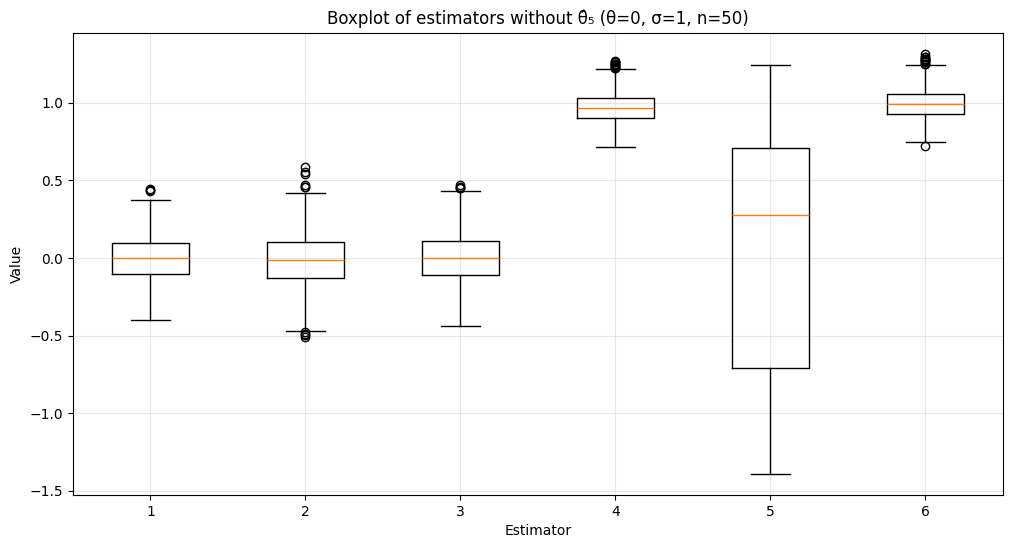

In [6]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df_no5)
plt.title(f'Boxplot of estimators without θ̂₅ (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()


# Complete analysis for different n, θ, and σ combinations


Parameters: n=20, θ=0, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0496 -0.0012  0.0496
θ̂₂    0.0734 -0.0006  0.0734
θ̂₃    0.0652 -0.0012  0.0653
θ̂₄    0.0236  0.9303  0.8891
θ̂₆    0.6794 -0.0014  0.6794
θ̂₇    0.0248  0.9861  0.9972


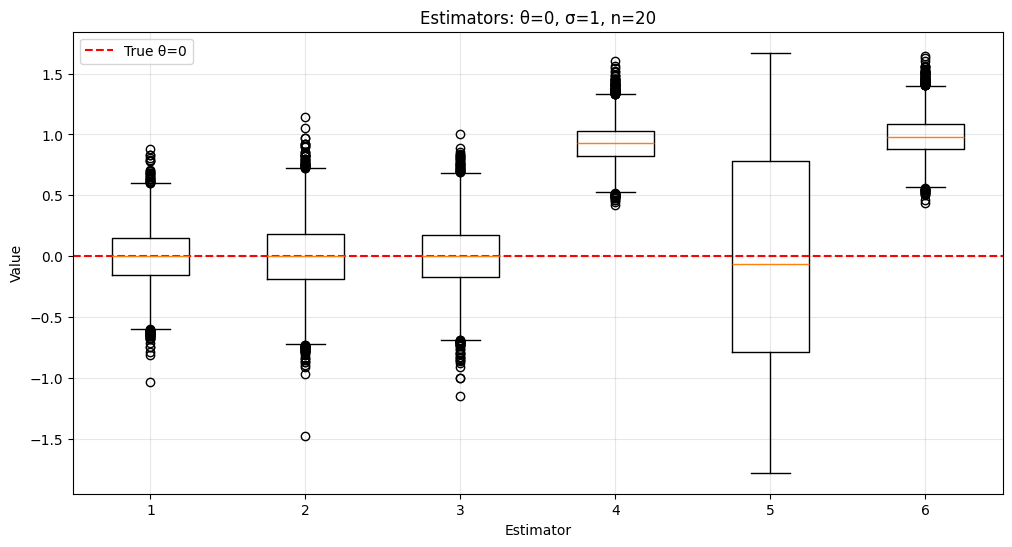


Parameters: n=20, θ=0, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.2024 -0.0022  0.2024
θ̂₂    0.3031  0.0006  0.3031
θ̂₃    0.2407 -0.0035  0.2407
θ̂₄    0.0930  1.8621  3.5604
θ̂₆    2.7306 -0.0275  2.7314
θ̂₇    0.0993  1.9744  3.9974


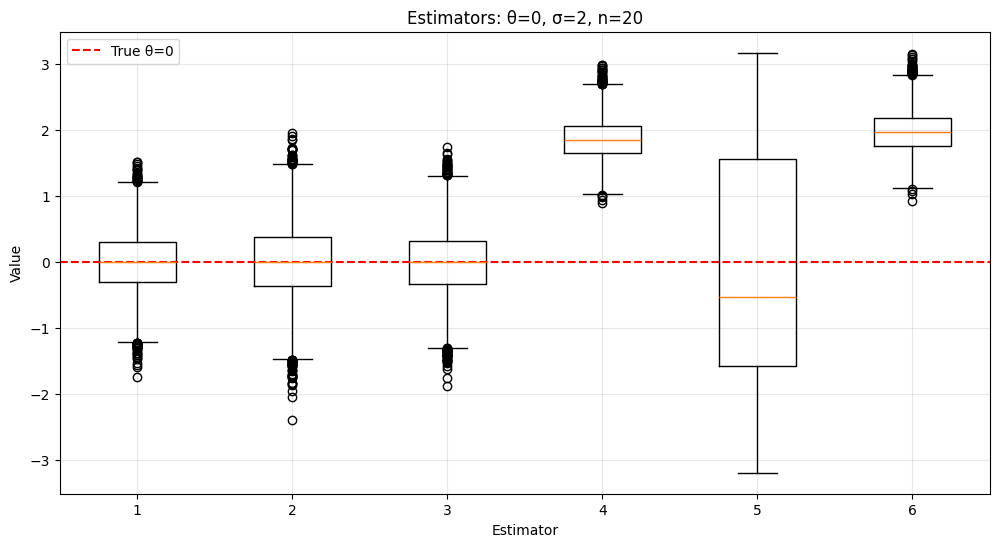


Parameters: n=20, θ=4, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0500 -0.0024  0.0500
θ̂₂    0.0731 -0.0023  0.0731
θ̂₃    0.0677 -0.0022  0.0677
θ̂₄    0.0235 -3.0677  9.4343
θ̂₆    0.0500  0.2221  0.0994
θ̂₇    0.0486  0.1151  0.0619


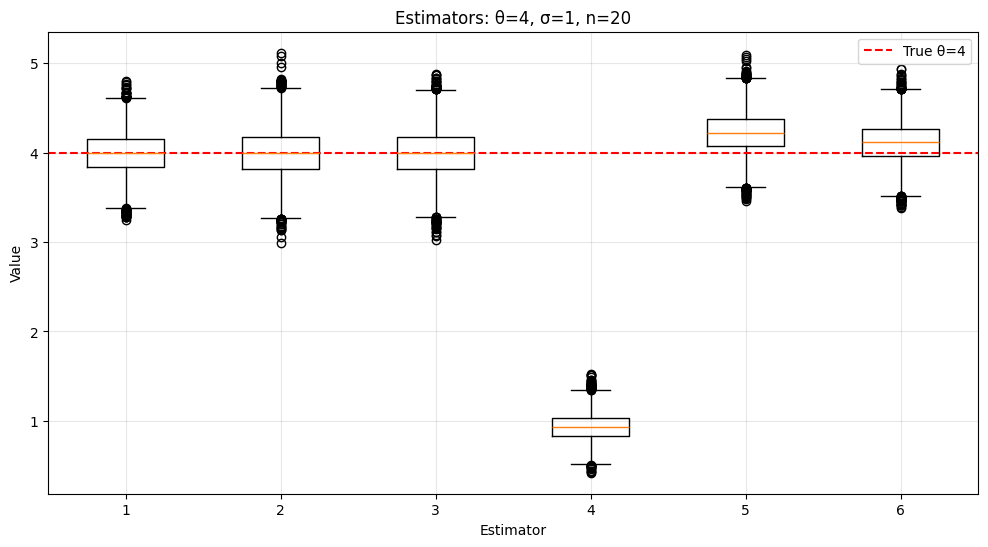


Parameters: n=20, θ=4, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.2017 -0.0037  0.2017
θ̂₂    0.3008 -0.0112  0.3009
θ̂₃    0.2591 -0.0066  0.2591
θ̂₄    0.0928 -2.1378  4.6632
θ̂₆    0.2022  0.7762  0.8048
θ̂₇    0.1827  0.4480  0.3835


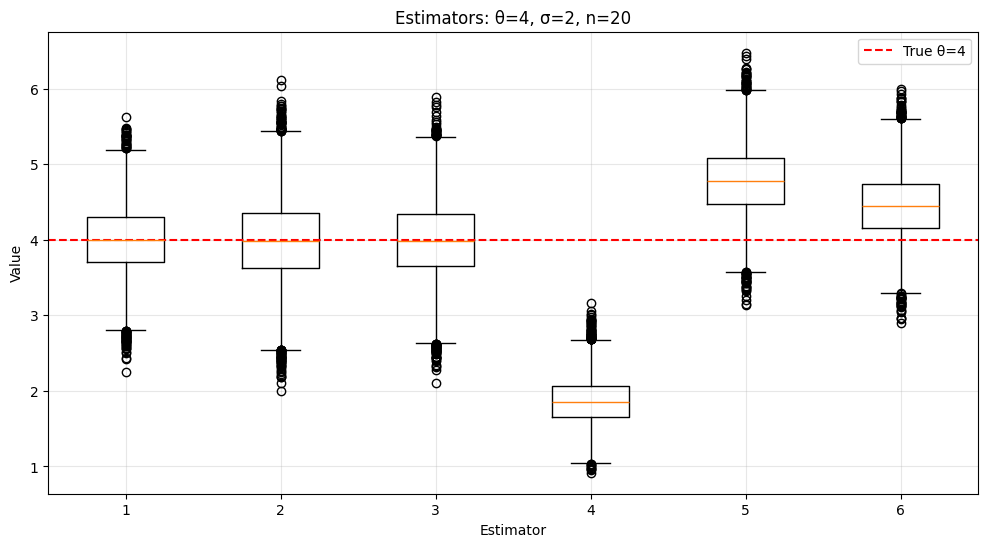


Parameters: n=50, θ=0, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0202 -0.0001  0.0202
θ̂₂    0.0308  0.0011  0.0308
θ̂₃    0.0245  0.0003  0.0245
θ̂₄    0.0097  0.9713  0.9531
θ̂₆    0.5205 -0.0003  0.5205
θ̂₇    0.0099  0.9955  1.0009


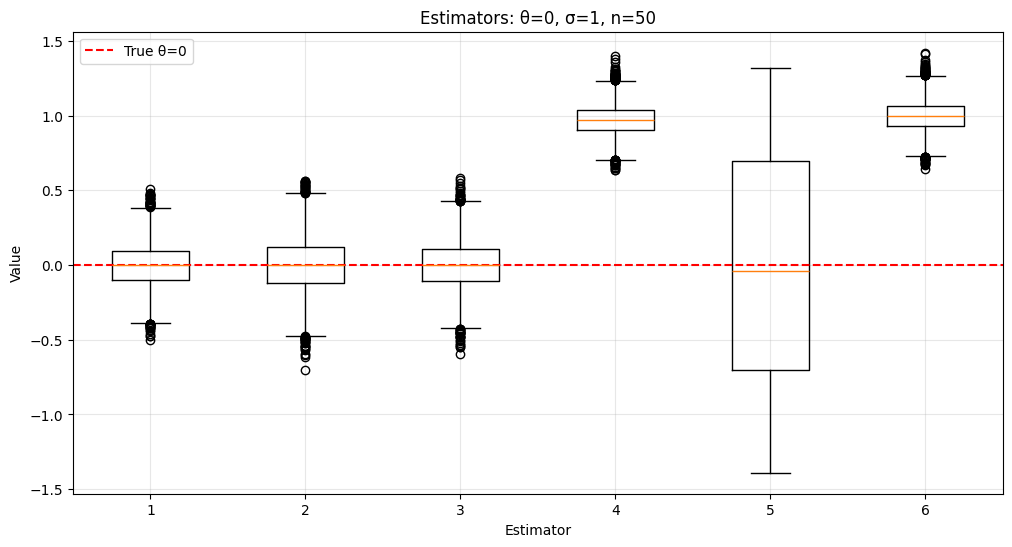


Parameters: n=50, θ=0, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0798 -0.0005  0.0798
θ̂₂    0.1205  0.0041  0.1205
θ̂₃    0.1073  0.0008  0.1073
θ̂₄    0.0390  1.9407  3.8055
θ̂₆    2.0808 -0.0026  2.0808
θ̂₇    0.0400  1.9886  3.9946


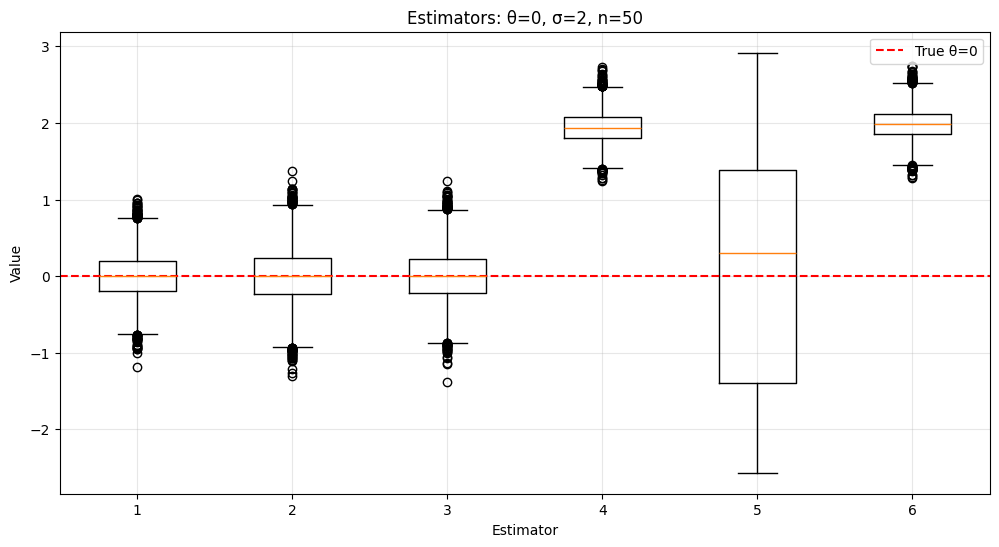


Parameters: n=50, θ=4, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0200  0.0027  0.0201
θ̂₂    0.0304  0.0018  0.0304
θ̂₃    0.0276  0.0029  0.0276
θ̂₄    0.0096 -3.0280  9.1781
θ̂₆    0.0200  0.2342  0.0748
θ̂₇    0.0194  0.1236  0.0347


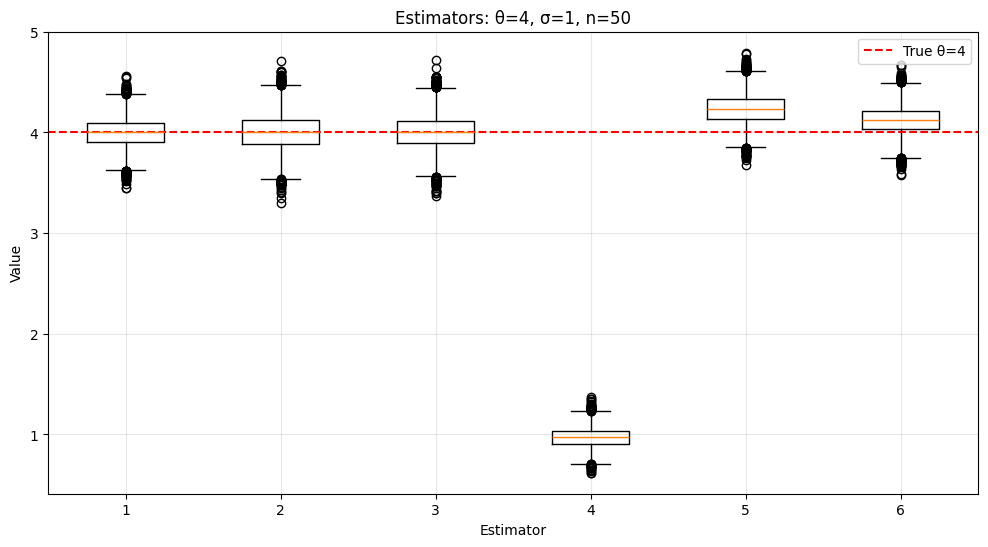


Parameters: n=50, θ=4, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0810 -0.0023  0.0810
θ̂₂    0.1227 -0.0036  0.1227
θ̂₃    0.1088 -0.0011  0.1088
θ̂₄    0.0393 -2.0568  4.2698
θ̂₆    0.0809  0.8028  0.7253
θ̂₇    0.0733  0.4625  0.2872


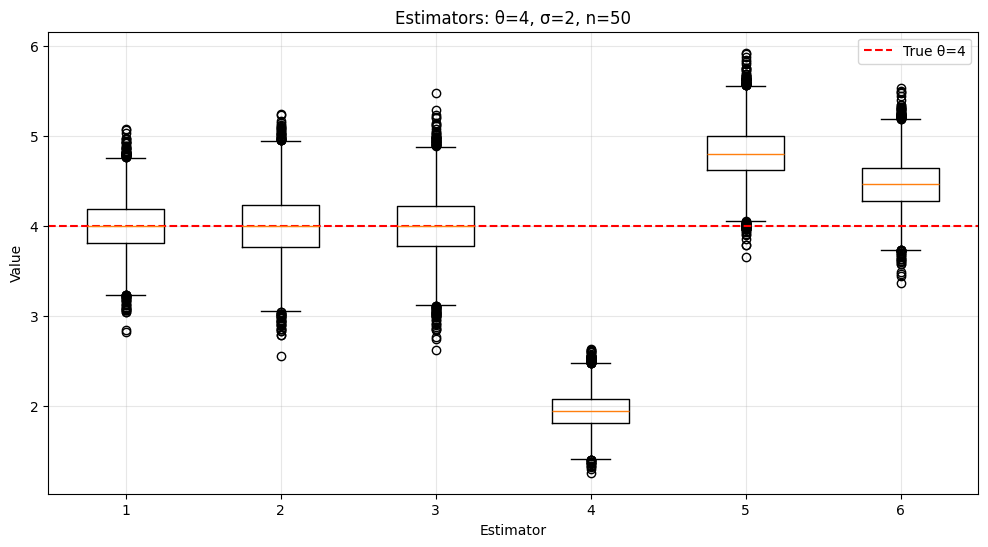


Parameters: n=100, θ=0, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0100 -0.0011  0.0100
θ̂₂    0.0157 -0.0008  0.0157
θ̂₃    0.0128 -0.0014  0.0128
θ̂₄    0.0050  0.9845  0.9742
θ̂₆    0.4189 -0.0042  0.4189
θ̂₇    0.0050  0.9971  0.9992


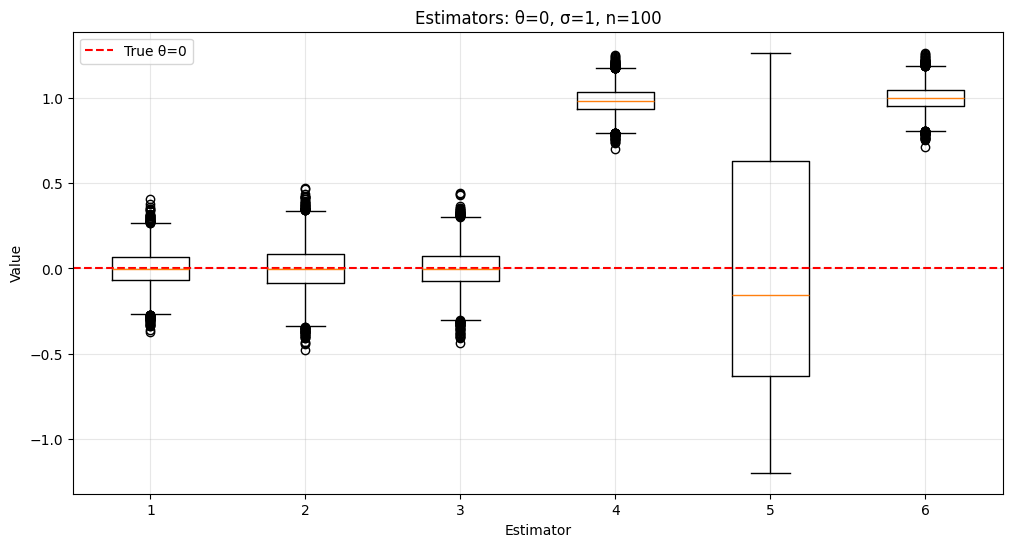


Parameters: n=100, θ=0, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0396  0.0066  0.0396
θ̂₂    0.0618  0.0081  0.0618
θ̂₃    0.0530  0.0074  0.0530
θ̂₄    0.0197  1.9670  3.8888
θ̂₆    1.6815  0.0300  1.6824
θ̂₇    0.0200  1.9922  3.9887


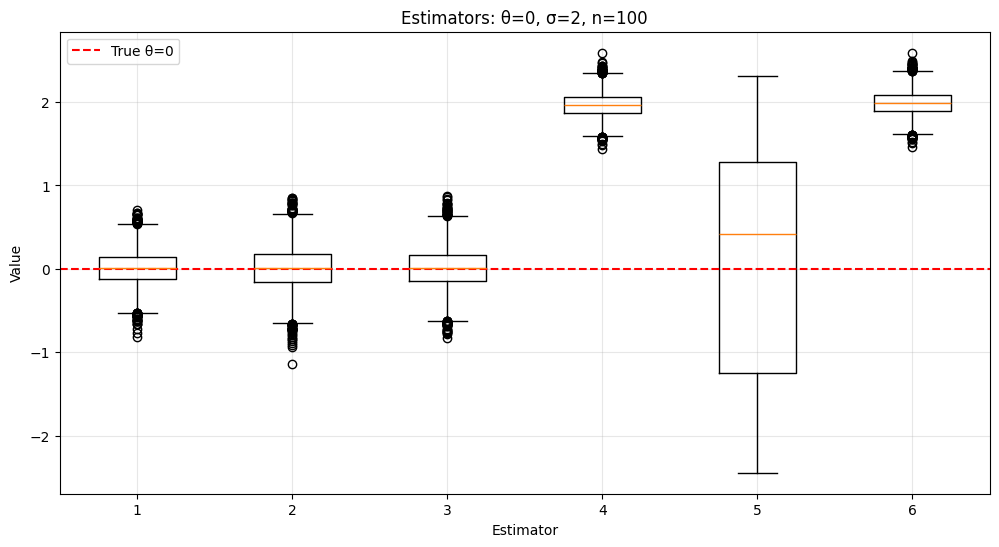


Parameters: n=100, θ=4, σ=1

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0099  0.0003  0.0099
θ̂₂    0.0156  0.0006  0.0156
θ̂₃    0.0126  0.0002  0.0126
θ̂₄    0.0050 -3.0153  9.0971
θ̂₆    0.0100  0.2337  0.0646
θ̂₇    0.0097  0.1222  0.0246


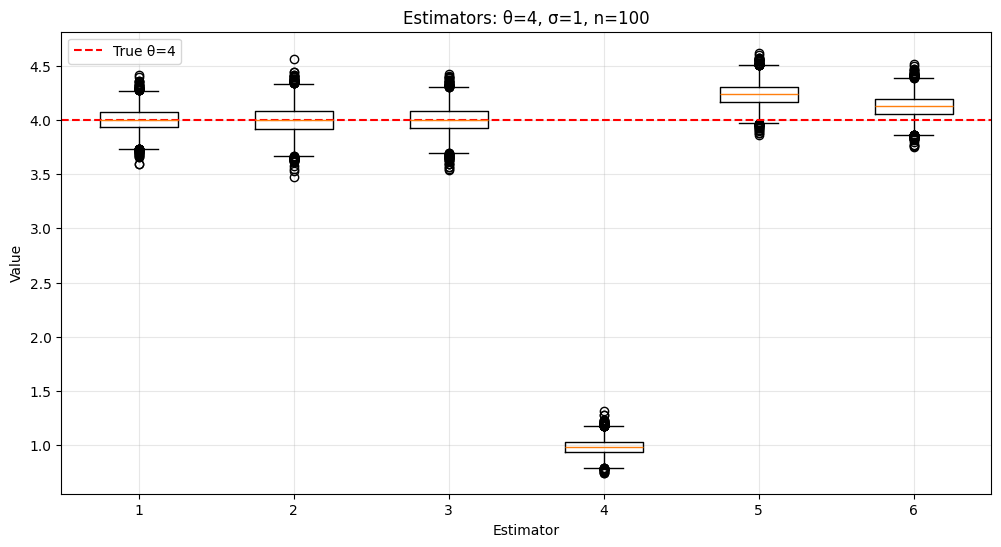


Parameters: n=100, θ=4, σ=2

Statistics:
     Variance    Bias     MSE
θ̂₁    0.0406  0.0033  0.0406
θ̂₂    0.0620  0.0024  0.0620
θ̂₃    0.0535  0.0033  0.0535
θ̂₄    0.0195 -2.0296  4.1387
θ̂₆    0.0403  0.8152  0.7049
θ̂₇    0.0366  0.4713  0.2587


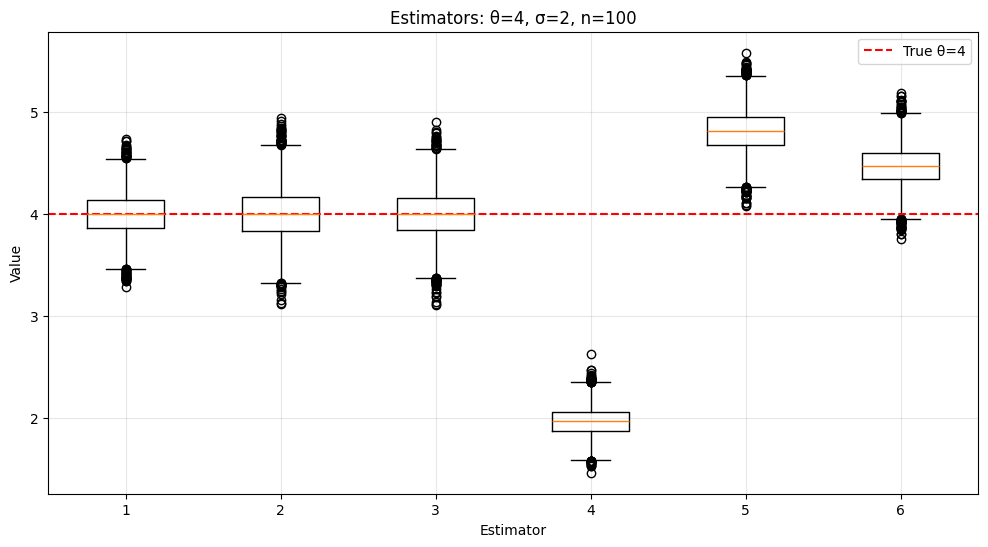

In [7]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

all_results = []

for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]

        print(f"\n{'='*60}")
        print(f"Parameters: n={n}, θ={theta}, σ={sigma}")
        print(f"{'='*60}")

        res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=True)

        print("\nStatistics:")
        print(stats_df.round(4))

        # Store results for comparison
        stats_df['n'] = n
        stats_df['theta'] = theta
        stats_df['sigma'] = sigma
        all_results.append(stats_df.copy())

        # Plot boxplot
        plt.figure(figsize=(12, 6))
        plt.boxplot(res_df)
        plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n}')
        plt.xlabel('Estimator')
        plt.ylabel('Value')
        plt.axhline(y=theta, color='r', linestyle='--', label=f'True θ={theta}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


# Summary comparison table

In [8]:
summary_df = pd.concat(all_results)
summary_df = summary_df.reset_index().rename(columns={'index': 'Estimator'})
print("\nComplete Summary:")
print(summary_df.to_string())



Complete Summary:
   Estimator  Variance      Bias       MSE    n  theta  sigma
0        θ̂₁  0.049606 -0.001244  0.049608   20      0      1
1        θ̂₂  0.073449 -0.000639  0.073449   20      0      1
2        θ̂₃  0.065249 -0.001184  0.065250   20      0      1
3        θ̂₄  0.023585  0.930324  0.889087   20      0      1
4        θ̂₆  0.679380 -0.001383  0.679382   20      0      1
5        θ̂₇  0.024845  0.986101  0.997240   20      0      1
6        θ̂₁  0.202391 -0.002187  0.202396   20      0      2
7        θ̂₂  0.303149  0.000606  0.303150   20      0      2
8        θ̂₃  0.240683 -0.003454  0.240694   20      0      2
9        θ̂₄  0.093040  1.862072  3.560351   20      0      2
10       θ̂₆  2.730631 -0.027541  2.731390   20      0      2
11       θ̂₇  0.099276  1.974366  3.997397   20      0      2
12       θ̂₁  0.050015 -0.002366  0.050021   20      4      1
13       θ̂₂  0.073118 -0.002338  0.073124   20      4      1
14       θ̂₃  0.067657 -0.002151  0.067661   20    

# Zadanie 2

In [9]:
def calculate_statistics_dist(results_df, true_theta):
    """Calculate statistics for distribution comparison"""
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values
        variance = np.var(estimates, ddof=1)
        bias = np.mean(estimates) - true_theta
        mse = variance + bias**2

        stats[col] = {
            'Mean': np.mean(estimates),
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    return pd.DataFrame(stats).T

def run_distribution_comparison(theta, sigma, n, num_simulations=10000):
    """Compare mean and median estimators across different distributions"""
    res_norm = []
    res_cauchy = []
    res_logistic = []

    for _ in range(num_simulations):
        norm_vector = norm.rvs(loc=theta, scale=sigma, size=n)
        cauchy_vector = cauchy.rvs(loc=theta, scale=sigma, size=n)
        logistic_vector = logistic.rvs(loc=theta, scale=sigma, size=n)

        est_norm_mean = norm_vector.mean()
        est_norm_med = np.median(norm_vector)
        res_norm.append([est_norm_mean, est_norm_med])

        est_cauchy_mean = cauchy_vector.mean()
        est_cauchy_med = np.median(cauchy_vector)
        res_cauchy.append([est_cauchy_mean, est_cauchy_med])

        est_logistic_mean = logistic_vector.mean()
        est_logistic_med = np.median(logistic_vector)
        res_logistic.append([est_logistic_mean, est_logistic_med])

    df_norm = pd.DataFrame(res_norm, columns=['Mean', 'Median'])
    df_cauchy = pd.DataFrame(res_cauchy, columns=['Mean', 'Median'])
    df_logistic = pd.DataFrame(res_logistic, columns=['Mean', 'Median'])

    stats_norm = calculate_statistics_dist(df_norm, theta)
    stats_cauchy = calculate_statistics_dist(df_cauchy, theta)
    stats_logistic = calculate_statistics_dist(df_logistic, theta)

    return {
        'norm': (df_norm, stats_norm),
        'cauchy': (df_cauchy, stats_cauchy),
        'logistic': (df_logistic, stats_logistic)
    }



Distribution Comparison: θ=0, σ=1, n=50

Normal Distribution:
          Mean  Variance    Bias     MSE
Mean    0.0004    0.0200  0.0004  0.0200
Median  0.0018    0.0309  0.0018  0.0309

Cauchy Distribution:
          Mean    Variance    Bias         MSE
Mean   -0.6158  12531.4702 -0.6158  12531.8494
Median -0.0012      0.0528 -0.0012      0.0528

Logistic Distribution:
          Mean  Variance    Bias     MSE
Mean   -0.0005    0.0652 -0.0005  0.0652
Median -0.0015    0.0768 -0.0015  0.0768


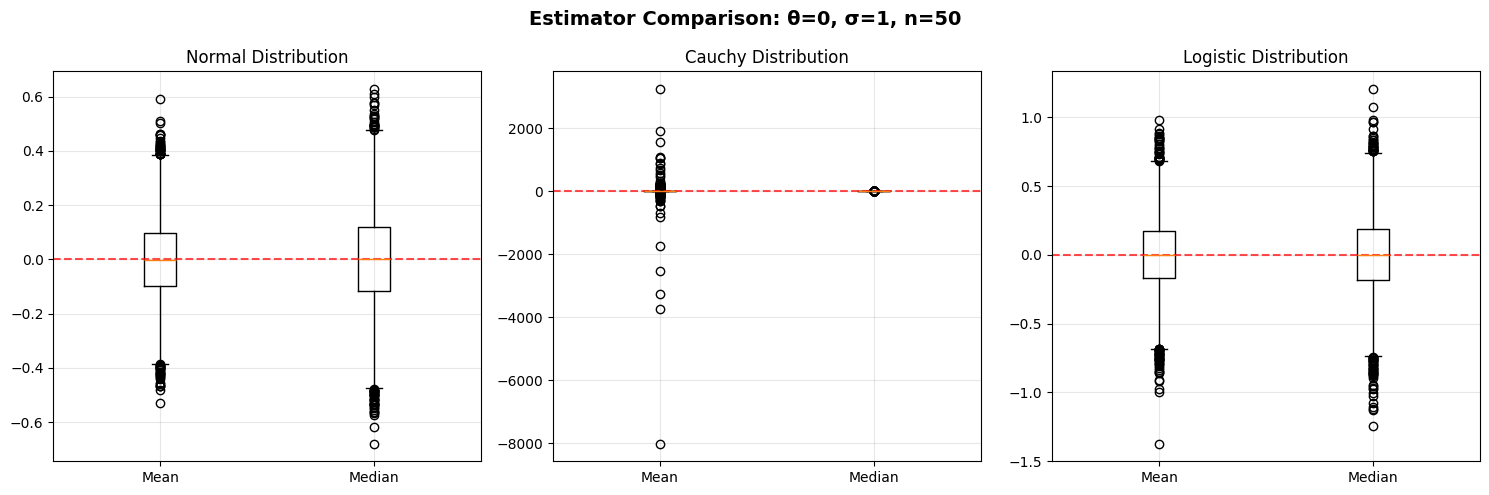


Distribution Comparison: θ=0, σ=2, n=50

Normal Distribution:
          Mean  Variance    Bias     MSE
Mean    0.0047    0.0820  0.0047  0.0820
Median  0.0059    0.1238  0.0059  0.1238

Cauchy Distribution:
          Mean    Variance    Bias         MSE
Mean   -1.5195  25208.2279 -1.5195  25210.5366
Median -0.0079      0.2056 -0.0079      0.2057

Logistic Distribution:
          Mean  Variance    Bias     MSE
Mean    0.0047    0.2589  0.0047  0.2590
Median  0.0051    0.3138  0.0051  0.3138


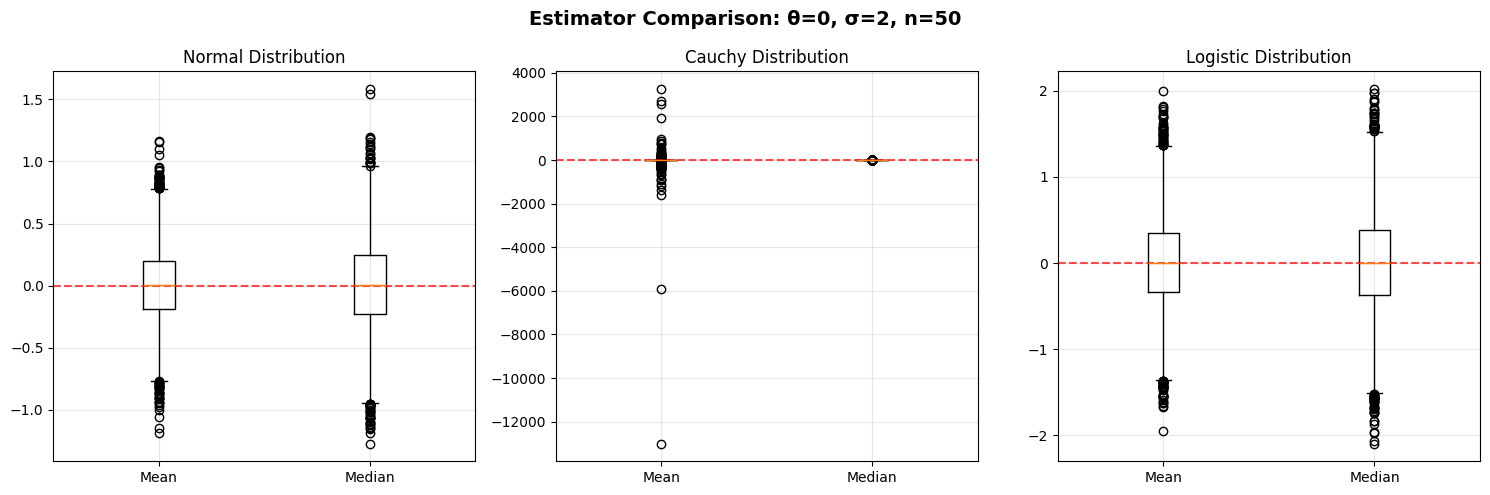


Distribution Comparison: θ=4, σ=1, n=50

Normal Distribution:
          Mean  Variance    Bias     MSE
Mean    3.9998    0.0200 -0.0002  0.0200
Median  3.9996    0.0306 -0.0004  0.0306

Cauchy Distribution:
          Mean    Variance    Bias         MSE
Mean    2.1478  46615.1376 -1.8522  46618.5683
Median  4.0004      0.0517  0.0004      0.0517

Logistic Distribution:
          Mean  Variance    Bias     MSE
Mean    3.9967    0.0670 -0.0033  0.0670
Median  3.9968    0.0796 -0.0032  0.0796


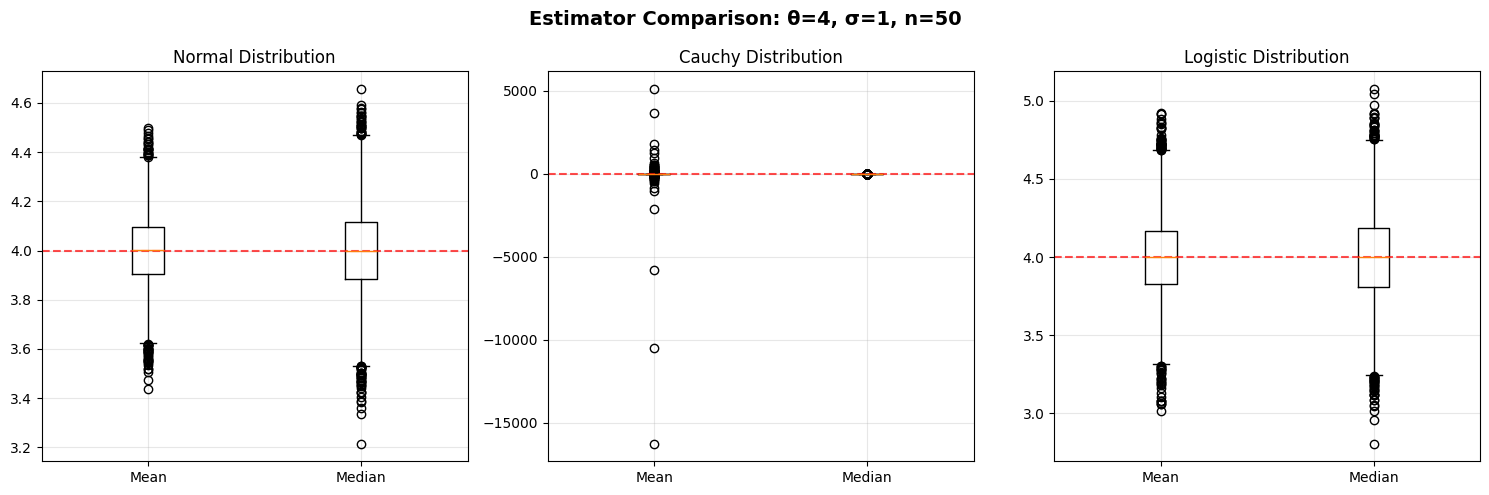


Distribution Comparison: θ=4, σ=2, n=50

Normal Distribution:
          Mean  Variance    Bias     MSE
Mean    3.9959    0.0816 -0.0041  0.0816
Median  3.9957    0.1240 -0.0043  0.1240

Cauchy Distribution:
          Mean     Variance    Bias          MSE
Mean    0.2148  340697.5754 -3.7852  340711.9029
Median  4.0003       0.2097  0.0003       0.2097

Logistic Distribution:
          Mean  Variance    Bias     MSE
Mean    4.0055    0.2619  0.0055  0.2620
Median  4.0083    0.3227  0.0083  0.3227


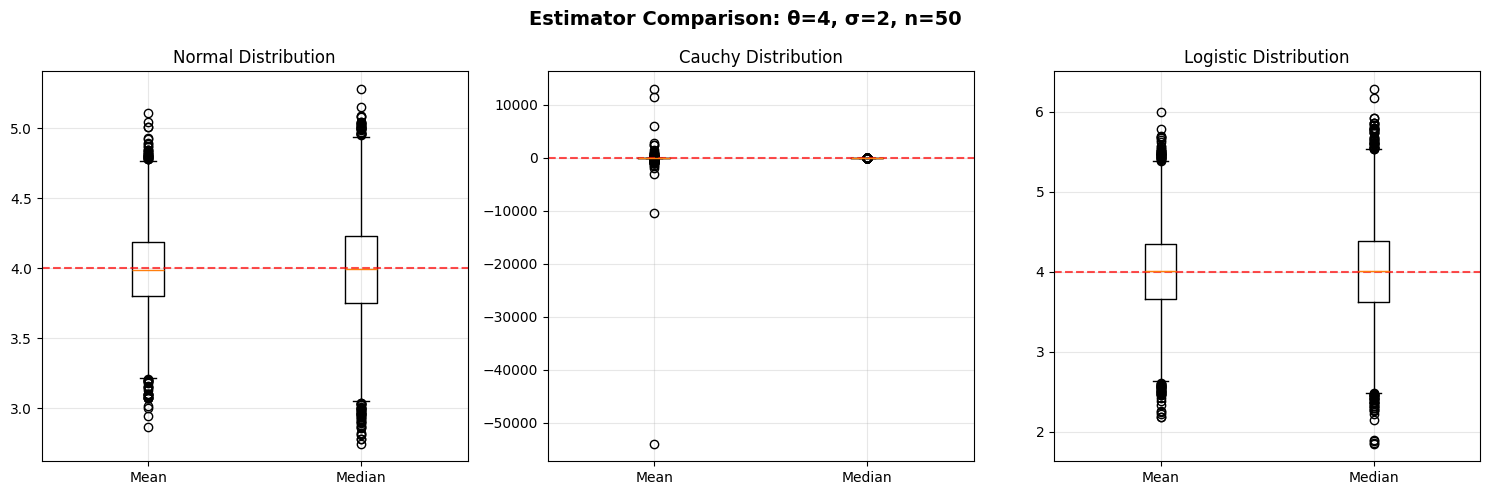

In [10]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for theta, sigma in zip(thetas, sigmas):
    print(f"\n{'='*60}")
    print(f"Distribution Comparison: θ={theta}, σ={sigma}, n={n}")
    print(f"{'='*60}")

    results = run_distribution_comparison(theta, sigma, n, num_simulations=10000)

    # Print statistics
    print("\nNormal Distribution:")
    print(results['norm'][1].round(4))

    print("\nCauchy Distribution:")
    print(results['cauchy'][1].round(4))

    print("\nLogistic Distribution:")
    print(results['logistic'][1].round(4))

    # Plot boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].boxplot(results['norm'][0])
    axes[0].set_title('Normal Distribution')
    axes[0].set_xticklabels(['Mean', 'Median'])
    axes[0].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[0].grid(True, alpha=0.3)

    axes[1].boxplot(results['cauchy'][0])
    axes[1].set_title('Cauchy Distribution')
    axes[1].set_xticklabels(['Mean', 'Median'])
    axes[1].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[1].grid(True, alpha=0.3)

    axes[2].boxplot(results['logistic'][0])
    axes[2].set_title('Logistic Distribution')
    axes[2].set_xticklabels(['Mean', 'Median'])
    axes[2].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[2].grid(True, alpha=0.3)

    fig.suptitle(f'Estimator Comparison: θ={theta}, σ={sigma}, n={n}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()